## Домашнее задание "Продвинутая линейная алгебра"

Придумайте матрицы, которые обладают следующими свойствами:  


In [60]:
import numpy as np
import math

# Уровень 0

In [22]:
# a) диагональная, ортогональная, но не единичная(!):  

a = np.array([[-1, 0], [0, 1]])
# проверка
at = a.transpose()
a.dot(at)

array([[1, 0],
       [0, 1]])

In [72]:
# b) верхнетреугольная, ортогональная: 

b = np.array([[-1, 0, 0], 
              [0, 1, 0],
              [0, 0, -1]
            ])

# проверка
bt = b.transpose()
b.dot(bt)

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [73]:
# c) нижнетреугольная, ортогональная:  

c = np.array([[-1, 0, 0], 
              [0, 1, 0],
              [0, 0, -1]
            ])

# проверка
ct = c.transpose()
c.dot(ct)

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [74]:
# d) матрица, у которой определитель = 1, и все элементы не равны 0:  

d = np.array([[2, 3], 
              [1, 2]])

# проверка
np.linalg.det(d)

1.0

In [68]:
# Найдите собственные значения и собственные вектора матриц: 

m = np.array([[2, 2], [1, 3]])
print(m)

[[2 2]
 [1 3]]


In [69]:
np.linalg.eig(m)

(array([1., 4.]), array([[-0.89442719, -0.70710678],
        [ 0.4472136 , -0.70710678]]))

# Уровень 1

In [89]:
# Найдите спектральное разложение матрицы:
m = np.array([[1, 2],
[2,3]])
print(m)

[[1 2]
 [2 3]]


In [77]:
eg = np.linalg.eig(m)
eg

(array([-0.23606798,  4.23606798]), array([[-0.85065081, -0.52573111],
        [ 0.52573111, -0.85065081]]))

In [84]:
x = np.array(eg[1])
x

array([[-0.85065081, -0.52573111],
       [ 0.52573111, -0.85065081]])

In [91]:
y = np.diag(eg[0])
y

array([[-0.23606798,  0.        ],
       [ 0.        ,  4.23606798]])

In [86]:
z = np.linalg.inv(x)

In [88]:
srm = x.dot(y).dot(z)
srm

array([[1., 2.],
       [2., 3.]])

Постройте зависимость качества восстановления рукописных цифр (MNIST) в зависимости от различного количества 
компонент PCA. В качестве метрики различия предлагаю использовать MSE

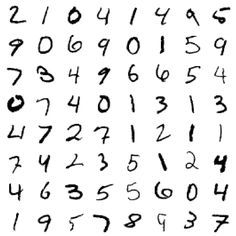

In [96]:
from PIL import Image
img = Image.open("mnist.jpg")
arr = np.array(img.getdata())
img

In [98]:
print(arr.size)
print(arr.size ** 0.5)

55696
236.0


In [118]:
x = np.resize(arr, (236, 236))
x

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])

In [131]:
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error as mse

i = 1
res = []
while i <= 235:
    pca = PCA(n_components = i)
    reduced = pca.fit_transform(x)
    y = pca.inverse_transform(reduced)
    m = mse(x, y)
    res.append(m)
    i += 1

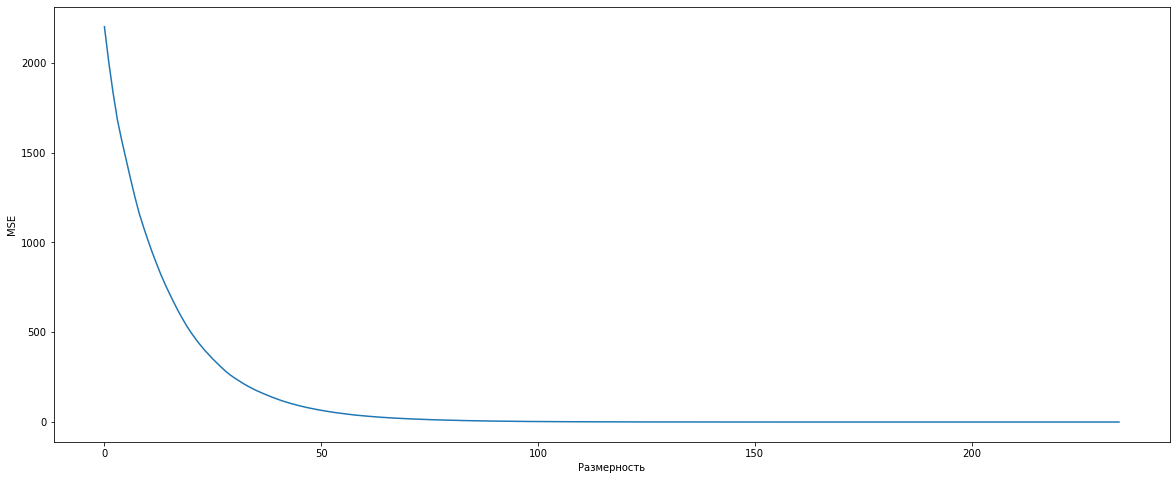

In [135]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
plt.plot(res)
plt.xlabel('Размерность')
plt.ylabel('MSE')
plt.show()